In [ ]:
# prompt: how to import the data from the pc to google colab

from google.colab import files
uploaded = files.upload()



Saving Company_Data.csv to Company_Data.csv


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('Company_Data.csv')

In [ ]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  
            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.00

<Axes: >

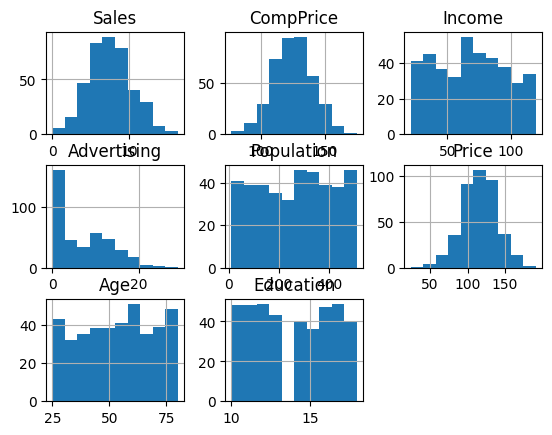

In [ ]:
# prompt: can you give some EDA  for my dataframe df including histograms and boxplots

# Print the first five rows of the DataFrame
print(df.head())

# Print the summary statistics of the DataFrame
print(df.describe())

# Create a histogram for each column in the DataFrame
df.hist()

# Create a boxplot for each column in the DataFrame
df.boxplot()


In [ ]:
# prompt: check whether df has null values or not

df.isnull().sum()


Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

<Axes: >

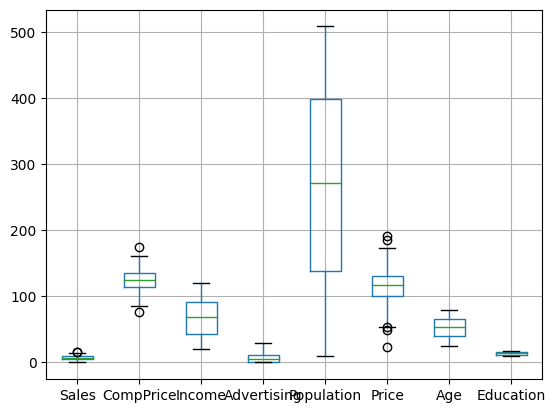

In [ ]:
df.boxplot()

In [ ]:
# prompt: my target variable is sales and  i want to label encode all my text variables in df

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over the columns in the DataFrame
for col in df.select_dtypes(include=['object']):
  # Fit the LabelEncoder to the data in the column
  le.fit(df[col])

  # Transform the data in the column using the fitted LabelEncoder
  df[col] = le.transform(df[col])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 34.5 KB


In [ ]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [ ]:
# prompt: give me the code of data partition and drop the variables of unnamed and High

# Data Partition
from sklearn.model_selection import train_test_split

X = df.drop(['Sales'], axis=1)  # Drop unnecessary columns
y = df['Sales']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the shapes of the training and testing sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (300, 10)
y_train shape: (300,)
X_test shape: (100, 10)
y_test shape: (100,)


Mean squared error: 5.250785


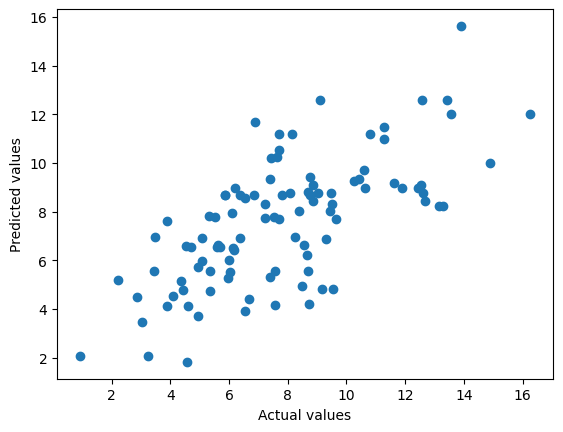

In [ ]:
# prompt: I want the same code for decision classifier for regression not for classifier

from sklearn.tree import DecisionTreeRegressor

# Create a DecisionTreeRegressor object
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

# Plot the results
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()


In [ ]:
#Cross validation
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
from sklearn.model_selection import train_test_split
training_error=[]
testing_error = []
for i in range(1,101):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)
    DTR.fit(x_train,y_train)
    y_pred_train= DTR.predict(x_train)
    y_pred_test = DTR.predict(x_test)
    training_error.append(np.sqrt(mean_squared_error(y_train, y_pred_train)))
    testing_error.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))


print("Cross validation training error:", np.mean(training_error).round(2))
print("Cross validation testing error:", np.mean(testing_error).round(2))

Cross validation training error: 0.0
Cross validation testing error: 2.3


In [ ]:
# prompt: print the number of nodes and depth of tree

print("The number of nodes in the tree is:", DTR.tree_.node_count)
print("The depth of the tree is:", DTR.tree_.max_depth)


The number of nodes in the tree is: 553
The depth of the tree is: 19


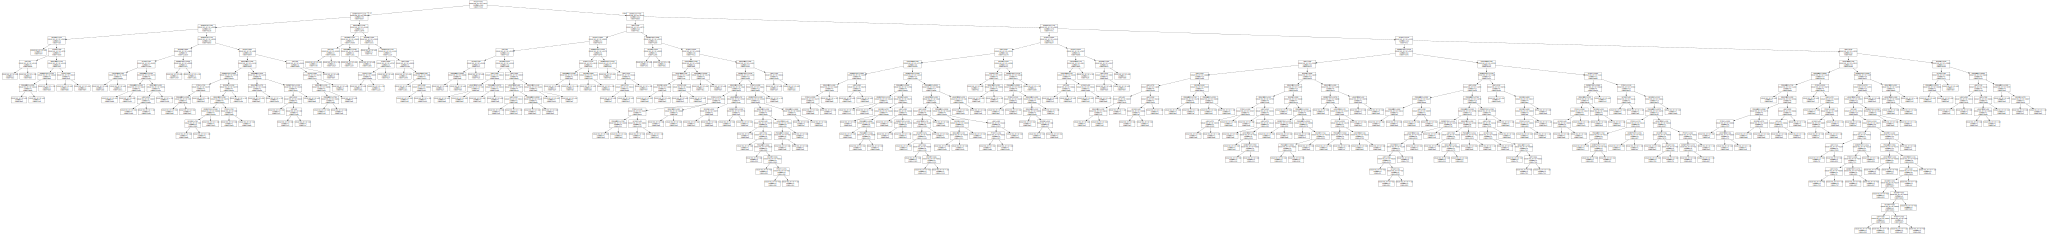

In [ ]:
# prompt: print the decision tree graph

!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(DTR, out_file=None, feature_names=X.columns)
graph = graphviz.Source(dot_data)
graph


In [ ]:
# Bagging Regressor
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

from sklearn.ensemble import BaggingRegressor
training_error = []
test_error = []
# Create a BaggingRegressor with 10 estimators
bag_R = BaggingRegressor(
    estimator= DecisionTreeRegressor(max_depth=8),
    n_estimators=100,
    max_features = 0.7, max_samples = 0.6) #max_depth tried on different values
#max_depth=11 train error = 1.02  , test error =  1.68
#max_depth=10 train error = 0.99 , test error =  1.62
#max_depth=9 train error = 1.02 , test error =  1.63
#max_depth=8 train error = 1.08  , test error = 1.6
#max_depth=12 train error = 1  , test error =  1.66
# Fit the model to the training data
bag_R.fit(X_train, y_train)

# Predict the labels for the training and test data
y_pred_train_bag = bag_R.predict(X_train)
y_pred_test_bag = bag_R.predict(X_test)

# Calculate the accuracy for the training and test data
training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train_bag)))
test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test_bag)))

print("Cross validation Training error: ", np.mean(training_error).round(2))
print("Cross validation Test error: ", np.mean(test_error).round(2))



Cross validation Training error:  1.07
Cross validation Test error:  1.62


In [ ]:
from sklearn.model_selection import train_test_split
training_error = []
test_error = []
for i in range(1,501):
    X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.30,random_state=i)
    bag_R.fit(X_train,Y_train)
    Y_pred_train = bag_R.predict(X_train)
    Y_pred_test = bag_R.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))

import numpy as np
print("Cross validation Training score: ", np.mean(training_error).round(2))
print("Cross validation Test score: ", np.mean(test_error).round(2))


Cross validation Training score:  1.08
Cross validation Test score:  1.08


In [ ]:
# prompt: random forest regressor for df

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

training_error = []
test_error = []
# Create a RandomForestRegressor with 100 estimators
RF_R = RandomForestRegressor(n_estimators=100, max_features = 0.7, max_samples = 0.6)
# Fit the model to the training data
RF_R.fit(X_train, y_train)

# Predict the labels for the training and test data
y_pred_train_RF = RF_R.predict(X_train)
y_pred_test_RF = RF_R.predict(X_test)

# Calculate the accuracy for the training and test data
training_error.append(np.sqrt(mean_squared_error(y_train,y_pred_train_RF)))
test_error.append(np.sqrt(mean_squared_error(y_test,y_pred_test_RF)))

print("Cross validation Training error: ", np.mean(training_error).round(2))
print("Cross validation Test error: ", np.mean(test_error).round(2))


training_error = []
test_error = []
for i in range(1,501):
    X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.30,random_state=i)
    RF_R.fit(X_train,Y_train)
    Y_pred_train = RF_R.predict(X_train)
    Y_pred_test = RF_R.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))

print("Cross validation Training score: ", np.mean(training_error).round(2))
print("Cross validation Test score: ", np.mean(test_error).round(2))


Cross validation Training error:  0.91
Cross validation Test error:  1.51
Cross validation Training score:  0.92
Cross validation Test score:  0.92


In [ ]:
# GradineBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
dt_model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.001)

training_error = []
test_error = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("Gradient Boosting-Cross validation Training error: ", np.mean(training_error).round(2))
print("Gradient Boosting-Cross validation Test error: ", np.mean(test_error).round(2))


Gradient Boosting-Cross validation Training error:  2.69
Gradient Boosting-Cross validation Test error:  2.69


In [ ]:
# prompt: can you give us code using gridsearchcv method

from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [0.7, 0.8, 0.9],
    'learning_rate': [0.01,0.1,0.5,1]}

# Create a BaggingClassifier instance
GB_reg = GradientBoostingRegressor()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(GB_reg, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, Y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict the labels for the test data using the best model
Y_pred_train = best_model.predict(X_train)
Y_pred_test = best_model.predict(X_test)

# Calculate the accuracy of the best model
test_error = np.sqrt(mean_squared_error(Y_test, Y_pred_test))
train_error = np.sqrt(mean_squared_error(Y_train, Y_pred_train))

# Print the accuracy of the best model
print("Train error (best model):", train_error)
print("Test error (best model):", test_error)


Best parameters: {'learning_rate': 0.1, 'max_features': 0.8, 'n_estimators': 100}
Train error (best model): 0.6452074164617042
Test error (best model): 1.2582705705270607


In [ ]:
# AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
dt_model = AdaBoostRegressor(n_estimators=200,learning_rate=0.01)

training_error = []
test_error = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("Ada Boosting-Cross validation Training error: ", np.mean(training_error).round(2))
print("Ada Boosting-Cross validation Test error: ", np.mean(test_error).round(2))


Ada Boosting-Cross validation Training error:  1.72
Ada Boosting-Cross validation Test error:  1.97


In [ ]:
 pip install xgboost


In [ ]:
from xgboost import XGBRegressor
dt_model = XGBRegressor(gamma=50,reg_lambda=20,n_estimators=100)

In [ ]:
training_error = []
test_error = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_error.append(np.sqrt(mean_squared_error(Y_train,Y_pred_train)))
    test_error.append(np.sqrt(mean_squared_error(Y_test,Y_pred_test)))
print("xgb-Cross validation Training error: ", np.mean(training_error).round(2))
print("xgb-Cross validation Test error: ", np.mean(test_error).round(2))


xgb-Cross validation Training error:  1.79
xgb-Cross validation Test error:  1.96


In [ ]:

#2)Use decision trees to prepare a model on fraud data
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

from google.colab import files
uploaded = files.upload()


Saving Fraud_check.csv to Fraud_check.csv


In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('Fraud_check.csv')
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
# prompt: can you give some EDA  for my dataframe df including histograms and boxplots

# Print the first five rows of the DataFrame
print(df.head())

# Print the summary statistics of the DataFrame
print(df.describe())

df.isnull()


  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  
       Taxable.Income  City.Population  Work.Experience
count      600.000000       600.000000       600.000000
mean     55208.375000    108747.368333        15.558333
std      26204.827597     49850.075134         8.842147
min      10003.000000     25779.000000         0.000000
25%      32871.500000     66966.750000         8.000000
50%      55074.500000    106493.500000        15.000000
75%      78611.750000    150114.250000        24.000000
max      99

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


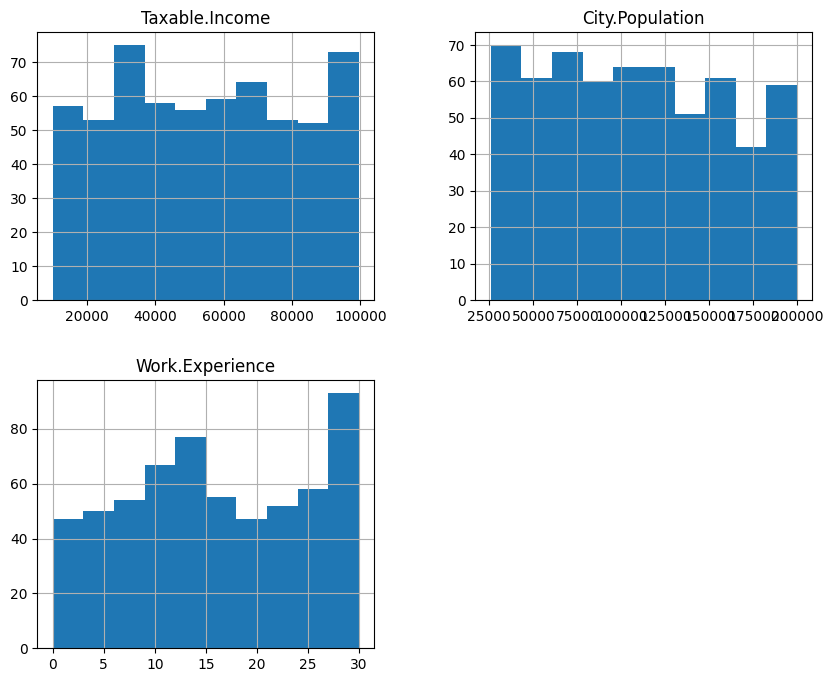

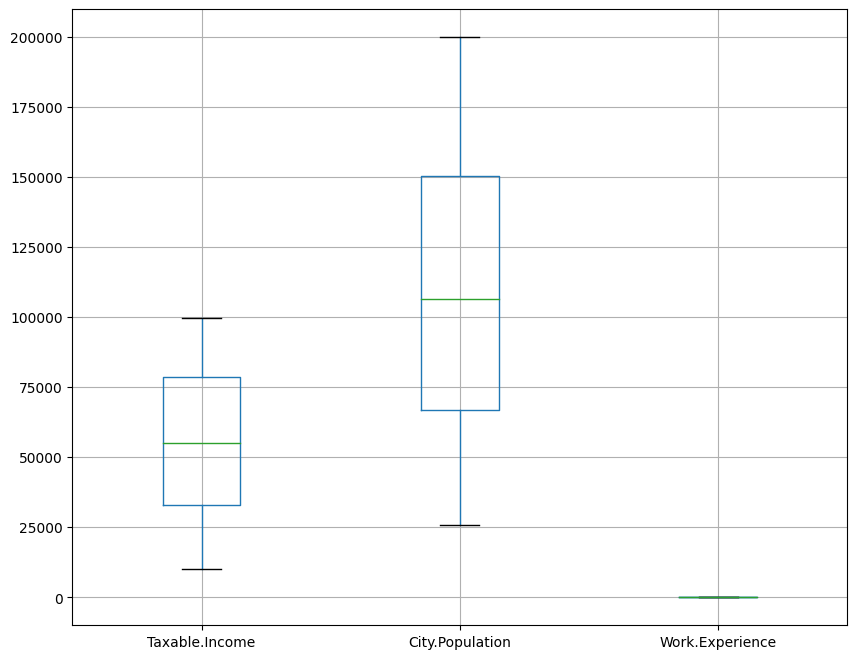

In [ ]:
# prompt: i want the histogram and boxplot for df with clearly not overlapping with one other

# Create a histogram for each column in the DataFrame
df.hist(figsize=(10, 8), bins=10)
plt.show()

# Create a boxplot for each column in the DataFrame
df.boxplot(figsize=(10, 8))
plt.show()


In [ ]:
# prompt: write for loop such that taxable income is less than or equal to 30,000 as risky other wise it as good create an column for thatif it is not

for i in range(len(df)):
  if df['Taxable.Income'][i] <= 30000:
    df['Taxable.Income'][i] = 'Risky'
  else:
    df['Taxable.Income'][i] = 'Good'

df.head()


<ipython-input-50-8d88d005a89d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Taxable.Income'][i] = 'Good'


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [ ]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO


In [ ]:
# prompt: give me the label encode for df text variables

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object'):
  df[col] = le.fit_transform(df[col])

df.head()


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [ ]:
# prompt: give me the code of data partition and drop the variables of unnamed and High

# Data Partition
from sklearn.model_selection import train_test_split

X = df.drop([ 'Taxable.Income'], axis=1)  # Drop unnecessary columns
y = df['Taxable.Income']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Print the shapes of the training and testing sets
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)


X_train shape: (420, 5)
y_train shape: (420,)
X_test shape: (180, 5)
y_test shape: (180,)


In [ ]:
# prompt: give me code of decision tree classifier to fit model

from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion='gini')

# Fit the model to the training data
clf = clf.fit(X_train, y_train)


In [ ]:
# prompt: calculate the accuracy on training and testing

# Calculate the accuracy on the training set
train_accuracy = clf.score(X_train, y_train)

# Calculate the accuracy on the testing set
test_accuracy = clf.score(X_test, y_test)

# Print the training and testing accuracy
print('Training accuracy:', train_accuracy)
print('Testing accuracy:', test_accuracy)


Training accuracy: 1.0
Testing accuracy: 0.6333333333333333


In [ ]:
# cross validation method
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion="gini",max_depth=11)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))
# max_depth=17    Cross validation Training score:  0.99 , Cross validation Test score:  0.65
# max_depth=15   Cross validation Training score:  0.97 , Cross validation Test score:  0.66
# max_depth=13    Cross validation Training score:  0.95 , Cross validation Test score:  0.67
# max_depth=12    Cross validation Training score:  0.94, Cross validation Test score:  0.67
# max_depth=11    Cross validation Training score:  0.92 , Cross validation Test score:  0.69

Cross validation Training score:  0.92
Cross validation Test score:  0.69


In [ ]:
# prompt: print the number of nodes and depth of tree

print("The number of nodes in the tree is:", dt_model.tree_.node_count)
print("The depth of the tree is:", dt_model.tree_.max_depth)


The number of nodes in the tree is: 151
The depth of the tree is: 11


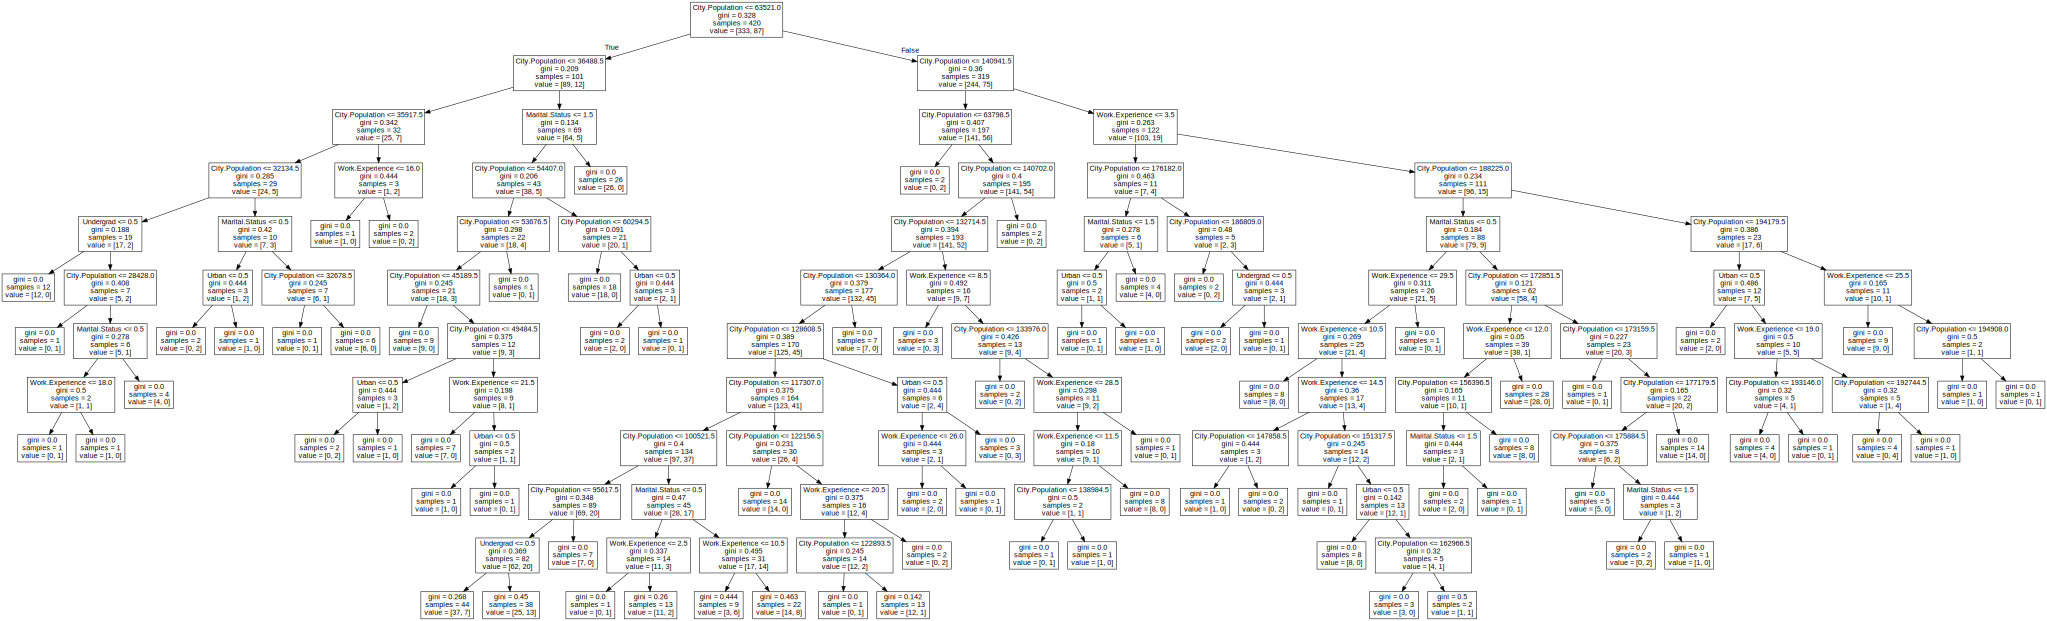

In [ ]:
# prompt: print the decision tree graph

#!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(dt_model, out_file=None, feature_names=X.columns)
graph = graphviz.Source(dot_data)
graph


In [ ]:
# Bagging classifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.25, random_state=0)

from sklearn.ensemble import BaggingClassifier

# Create a BaggingClassifier with 10 estimators
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=11),
    n_estimators=100,
    max_features = 0.7, max_samples = 0.6)

# Fit the model to the training data
bag_clf.fit(X_train, y_train)

# Predict the labels for the training and test data
y_pred_train_bag = bag_clf.predict(X_train)
y_pred_test_bag = bag_clf.predict(X_test)

# Calculate the accuracy for the training and test data
accuracy_train_bag = accuracy_score(y_train, y_pred_train_bag)
accuracy_test_bag = accuracy_score(y_test, y_pred_test_bag)

# Print the accuracies
print("Training accuracy (bagging):", accuracy_train_bag)
print("Testing accuracy (bagging):", accuracy_test_bag)


Training accuracy (bagging): 0.8244444444444444
Testing accuracy (bagging): 0.7533333333333333


In [ ]:
# cross validation method  --> Bagging Classifier

from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.30,random_state=i)
    bag_clf.fit(X_train,Y_train)
    Y_pred_train = bag_clf.predict(X_train)
    Y_pred_test = bag_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))


Cross validation Training score:  0.84
Cross validation Test score:  0.79


In [ ]:
# Random Forest classifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.25, random_state=0)


from sklearn.ensemble import RandomForestClassifier
# Create a RandomForestClassifier with 10 estimators
Rf_clf = RandomForestClassifier(n_estimators=100,
    max_features = 0.7, max_samples = 0.6)

# Fit the model to the training data
Rf_clf.fit(X_train, y_train)

# Predict the labels for the training and test data
y_pred_train_Rf = Rf_clf.predict(X_train)
y_pred_test_Rf = Rf_clf.predict(X_test)

# Calculate the accuracy for the training and test data
accuracy_train_Rf = accuracy_score(y_train, y_pred_train_Rf)
accuracy_test_Rf = accuracy_score(y_test, y_pred_test_Rf)

# Print the accuracies
print("Training accuracy (Rf):", accuracy_train_Rf)
print("Testing accuracy (Rf):", accuracy_test_Rf)


Training accuracy (Rf): 0.9444444444444444
Testing accuracy (Rf): 0.7533333333333333


In [ ]:
# cross validation method  --> Random Forests

from sklearn.model_selection import train_test_split

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.30,random_state=i)
    Rf_clf.fit(X_train,Y_train)
    Y_pred_train = Rf_clf.predict(X_train)
    Y_pred_test = Rf_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))


Cross validation Training score:  0.95
Cross validation Test score:  0.77


In [69]:


# Gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.30, random_state=0)


# Create a GradientBoostingClassifier with 10 estimators
GB_clf = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01)

# Fit the model to the training data
GB_clf.fit(X_train, y_train)

# Predict the labels for the training and test data
y_pred_train_GB = GB_clf.predict(X_train)
y_pred_test_GB = GB_clf.predict(X_test)

# Calculate the accuracy for the training and test data
accuracy_train_GB = accuracy_score(y_train, y_pred_train_GB)
accuracy_test_GB = accuracy_score(y_test, y_pred_test_GB)

# Print the accuracies
print("Training accuracy (GB):", accuracy_train_GB)
print("Testing accuracy (GB):", accuracy_test_GB)

# cross validation method  --> Gradient Boosting


training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.30,random_state=i)
    GB_clf.fit(X_train,Y_train)
    Y_pred_train = GB_clf.predict(X_train)
    Y_pred_test = GB_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation Training score: ", np.mean(training_accuracy).round(2))
print("Cross validation Test score: ", np.mean(test_accuracy).round(2))


Training accuracy (GB): 0.8119047619047619
Testing accuracy (GB): 0.7555555555555555
Cross validation Training score:  0.8
Cross validation Test score:  0.79


In [71]:
# prompt: can you give us code using gridsearchcv method

from sklearn.model_selection import GridSearchCV

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': [0.7, 0.8, 0.9],
    'learning_rate': [0.01,0.1,0.5,1]}

# Create a BaggingClassifier instance
GB_clf = GradientBoostingClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(GB_clf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train, Y_train)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict the labels for the test data using the best model
Y_pred_train = best_model.predict(X_train)
Y_pred_test = best_model.predict(X_test)

# Calculate the accuracy of the best model
training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

# Print the accuracy of the best model
print("Train error (best model):", train_accuracy)
print("Test error (best model):", test_accuracy)


Best parameters: {'learning_rate': 0.01, 'max_features': 0.7, 'n_estimators': 100}
Train error (best model): 1.0
Test error (best model): [0.8, 0.7888888888888889, 0.7666666666666667, 0.7944444444444444, 0.8, 0.7333333333333333, 0.7944444444444444, 0.8, 0.7777777777777778, 0.7611111111111111, 0.7833333333333333, 0.8388888888888889, 0.8277777777777777, 0.8055555555555556, 0.8388888888888889, 0.8388888888888889, 0.7666666666666667, 0.7277777777777777, 0.7833333333333333, 0.7888888888888889, 0.8055555555555556, 0.7833333333333333, 0.8111111111111111, 0.8, 0.7944444444444444, 0.7833333333333333, 0.7944444444444444, 0.7555555555555555, 0.7777777777777778, 0.7722222222222223, 0.7888888888888889, 0.8166666666666667, 0.7888888888888889, 0.8111111111111111, 0.7888888888888889, 0.7611111111111111, 0.7944444444444444, 0.7777777777777778, 0.7833333333333333, 0.7777777777777778, 0.7944444444444444, 0.7888888888888889, 0.7777777777777778, 0.7555555555555555, 0.8111111111111111, 0.7944444444444444, 0

In [74]:
# AdaBoost CLassifier
from sklearn.ensemble import AdaBoostClassifier
dt_model = AdaBoostClassifier(n_estimators=200,learning_rate=0.01)

training_accuracy = []
test_accuracy = []
for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.30,random_state=i)
    dt_model.fit(X_train,Y_train)
    Y_pred_train = dt_model.predict(X_train)
    Y_pred_test = dt_model.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))


print("Ada Boosting-Cross validation Training error: ", np.mean(training_accuracy).round(2))
print("Ada Boosting-Cross validation Test error: ", np.mean(test_accuracy).round(2))


Ada Boosting-Cross validation Training error:  0.79
Ada Boosting-Cross validation Test error:  0.79
